**Required imports**

In [1]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

from google.colab import drive

In [2]:
random.seed(42)

Downloading CelebA dataset using kaggle API and unpacking it on local machine.

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.chdir('/content/drive/MyDrive/kaggle')
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'
!kaggle datasets download -d jessicali9530/celeba-dataset
os.chdir('/content')
!cp '/content/drive/MyDrive/kaggle/celeba-dataset.zip' .
!unzip -q 'celeba-dataset.zip'

celeba-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Loading list_attr_celeba.csv into Pandas dataframe.
---
File contains attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative.

In [5]:
attr_celeba = pd.read_csv("/content/list_attr_celeba.csv")
attr_celeba.head(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


Loading list_bbox_celeba.csv into Pandas dataframe.
---
Bounding box information for each image. "x_1" and "y_1" represent the upper left point coordinate of bounding box. "width" and "height" represent the width and height of bounding box

In [6]:
bbox_celeba = pd.read_csv("/content/list_bbox_celeba.csv")
bbox_celeba.head(5)

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


Loading list_eval_partition.csv into Pandas dataframe.
---
Recommended partitioning of the images into training, validation, testing sets. "0" represents training image, "1" represents validation image, "2" represents testing image. Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing

In [7]:
eval_partition = pd.read_csv("/content/list_eval_partition.csv")
eval_partition

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


Loading list_landmarks_allign_celeba.csv into Pandas dataframe.
---
Positions of the key feature of the face.


In [8]:
landmarks_alligns = pd.read_csv("/content/list_landmarks_align_celeba.csv")
landmarks_alligns.head(5)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


Loading train, test and eval parts of the datasets and explore them.
---

In [9]:
# Concatinating csv files with attributes and paritioning of the dataset
df_celeba = pd.merge(attr_celeba, eval_partition, on='image_id')
df_celeba['partition'] = df_celeba['partition'].replace(
  {0: 'train', 1: 'val', 2: 'test'}
  )
print(f'Row count: {df_celeba.shape[0]}')
df_celeba.head(5)

Row count: 202599


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,partition
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,train
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,train
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,train
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,train
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,train


In [10]:
df_train = df_celeba[df_celeba['partition'] == 'train']
print(f'Row count: {df_train.shape[0]}')
df_train.head(5)

Row count: 162770


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,partition
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,train
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,train
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,train
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,train
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,train


In [11]:
df_val = df_celeba[df_celeba['partition'] == 'val']
print(f'Row count: {df_val.shape[0]}')
df_val.head(5)

Row count: 19867


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,partition
162770,162771.jpg,-1,-1,1,-1,-1,1,1,-1,-1,...,1,-1,1,-1,-1,1,-1,-1,1,val
162771,162772.jpg,-1,-1,-1,-1,-1,-1,-1,1,1,...,1,-1,1,-1,-1,-1,-1,1,-1,val
162772,162773.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,val
162773,162774.jpg,1,-1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,-1,1,1,val
162774,162775.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,1,-1,-1,1,val


In [12]:
df_test = df_celeba[df_celeba['partition'] == 'test']
print(f'Row count: {df_test.shape[0]}')
df_test.head(5)

Row count: 19962


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,partition
182637,182638.jpg,-1,1,-1,1,-1,-1,-1,-1,-1,...,1,-1,1,1,1,-1,-1,-1,-1,test
182638,182639.jpg,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,1,-1,-1,1,-1,-1,1,test
182639,182640.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,-1,1,-1,-1,1,test
182640,182641.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,1,-1,1,-1,-1,1,test
182641,182642.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,-1,-1,-1,-1,-1,-1,-1,1,test


In [13]:
celeba_counts = df_celeba.apply(lambda x: x.value_counts().get(1, 0))
train_counts = df_train.apply(lambda x: x.value_counts().get(1, 0))
val_counts = df_val.apply(lambda x: x.value_counts().get(1, 0))
test_counts = df_test.apply(lambda x: x.value_counts().get(1, 0))

data = {
  'Whole Dataset': celeba_counts,
  'Train Dataset': train_counts,
  'Validation Dataset': val_counts,
  'Test Dataset': test_counts
}

df_counts = pd.DataFrame(data).drop('image_id').drop('partition')
print(f'Row count: {df_counts.shape[0]}')
df_counts.head(5)

Row count: 40


,Whole Dataset,Train Dataset,Validation Dataset,Test Dataset
5_o_Clock_Shadow,22516,18177,2345,1994
Arched_Eyebrows,54090,43278,5134,5678
Attractive,103833,83603,10332,9898
Bags_Under_Eyes,41446,33280,4121,4045
Bald,4547,3713,411,423


In [14]:
row_counts = {
  'Whole Dataset': df_celeba.shape[0],
  'Train Dataset': df_train.shape[0],
  'Validation Dataset': df_val.shape[0],
  'Test Dataset': df_test.shape[0]
}

df_row_counts = pd.DataFrame(row_counts, index=['Count'])

df_counts = pd.concat([df_row_counts, df_counts])
df_counts.head(5)

,Whole Dataset,Train Dataset,Validation Dataset,Test Dataset
Count,202599,162770,19867,19962
5_o_Clock_Shadow,22516,18177,2345,1994
Arched_Eyebrows,54090,43278,5134,5678
Attractive,103833,83603,10332,9898
Bags_Under_Eyes,41446,33280,4121,4045


In [15]:
df_counts['Train_pct'] = df_counts['Train Dataset'] / df_counts['Whole Dataset'] * 100
df_counts['Validation_pct'] = df_counts['Validation Dataset'] / df_counts['Whole Dataset'] * 100
df_counts['Test_pct'] = df_counts['Test Dataset'] / df_counts['Whole Dataset'] * 100

df_counts.head(5)

,Whole Dataset,Train Dataset,Validation Dataset,Test Dataset,Train_pct,Validation_pct,Test_pct
Count,202599,162770,19867,19962,80.340969,9.806070,9.852961
5_o_Clock_Shadow,22516,18177,2345,1994,80.729259,10.414816,8.855925
Arched_Eyebrows,54090,43278,5134,5678,80.011093,9.491588,10.497319
Attractive,103833,83603,10332,9898,80.516791,9.950594,9.532615
Bags_Under_Eyes,41446,33280,4121,4045,80.297254,9.943058,9.759687


Average train percentage: 80.35316113505988, Standard deviation: 0.6477314856017222
Average validation percentage: 9.794833484713713, Standard deviation: 1.1191356288073253
Average test percentage: 9.852005380226407, Standard deviation: 1.175889706829015


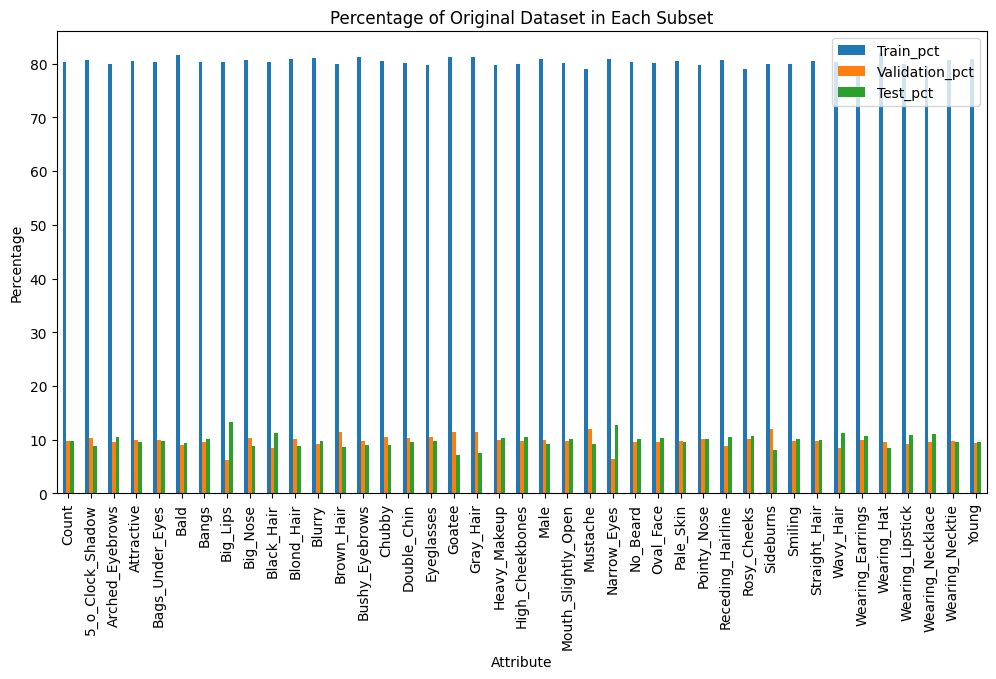

In [16]:
import matplotlib.pyplot as plt

avg_train_pct = df_counts['Train_pct'].mean()
std_train_pct = df_counts['Train_pct'].std()

avg_validation_pct = df_counts['Validation_pct'].mean()
std_validation_pct = df_counts['Validation_pct'].std()

avg_test_pct = df_counts['Test_pct'].mean()
std_test_pct = df_counts['Test_pct'].std()

print(f'Average train percentage: {avg_train_pct}, Standard deviation: {std_train_pct}')
print(f'Average validation percentage: {avg_validation_pct}, Standard deviation: {std_validation_pct}')
print(f'Average test percentage: {avg_test_pct}, Standard deviation: {std_test_pct}')

df_counts[['Train_pct', 'Validation_pct', 'Test_pct']].plot(kind='bar', figsize=(12, 6))
plt.title('Percentage of Original Dataset in Each Subset')
plt.xlabel('Attribute')
plt.ylabel('Percentage')
plt.show()

In [17]:
path = '/content/img_align_celeba/img_align_celeba/'
sample_images = 25

random_images = random.sample(list(df_train['image_id']), sample_images)

for i, image_id in enumerate(random_images):
  img = Image.open(path + image_id)
  print(f'Path: {path + image_id}, Image Shape: {img.size}')

  if i > 5:
    break

Path: /content/img_align_celeba/img_align_celeba/029185.jpg, Image Shape: (178, 218)
Path: /content/img_align_celeba/img_align_celeba/006557.jpg, Image Shape: (178, 218)
Path: /content/img_align_celeba/img_align_celeba/072098.jpg, Image Shape: (178, 218)
Path: /content/img_align_celeba/img_align_celeba/064197.jpg, Image Shape: (178, 218)
Path: /content/img_align_celeba/img_align_celeba/058514.jpg, Image Shape: (178, 218)
Path: /content/img_align_celeba/img_align_celeba/036580.jpg, Image Shape: (178, 218)
Path: /content/img_align_celeba/img_align_celeba/026869.jpg, Image Shape: (178, 218)


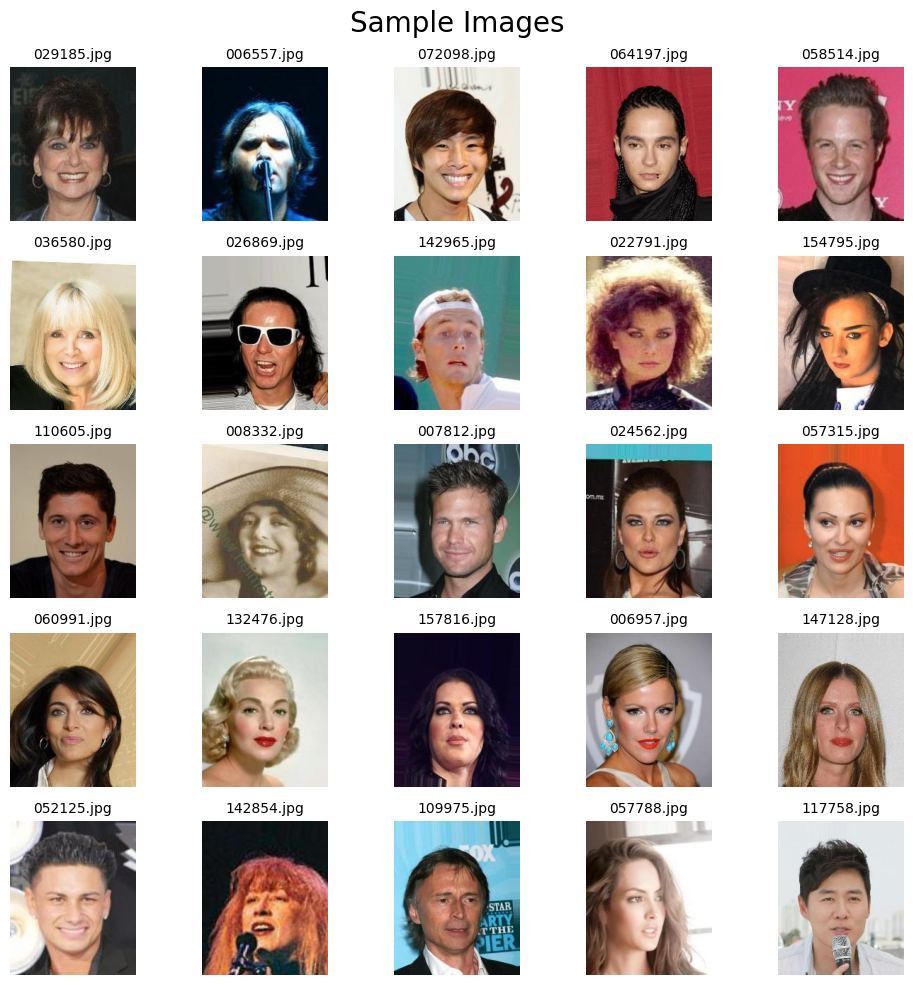

In [18]:
fig = plt.figure(figsize=(10, 10))

for i, image_id in enumerate(random_images):
  img = Image.open(path + image_id)

  ax = fig.add_subplot(int(np.sqrt(sample_images)), int(np.sqrt(sample_images)), i+1)
  ax.set_title(image_id, fontsize=10)

  plt.imshow(np.array(img))
  plt.axis('off')

plt.suptitle('Sample Images', fontsize=20)
plt.tight_layout()

plt.show()

In [23]:
image_id = '006957.jpg'
df_sample = df_train[df_train['image_id'] == image_id]

for index, row in df_sample.iterrows():
  index = str(index).zfill(6)
  print(f"Image: {row['image_id']}, attributes: {row[row == 1].index.tolist()}")

Image: 006957.jpg, attributes: ['Attractive', 'Blond_Hair', 'Brown_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open', 'No_Beard', 'Oval_Face', 'Pointy_Nose', 'Rosy_Cheeks', 'Smiling', 'Wearing_Earrings', 'Wearing_Lipstick', 'Young']


In [24]:
df_samples = df_train[df_train['image_id'].isin(random_images)]
print(f'Row count: {df_samples.shape[0]}')

for index, row in df_samples.iterrows():
  index = str(index).zfill(6)
  print(f"Image: {row['image_id']}, attributes: {row[row == 1].index.tolist()}")

Row count: 25
Image: 006557.jpg, attributes: ['Goatee', 'Male', 'Young']
Image: 006957.jpg, attributes: ['Attractive', 'Blond_Hair', 'Brown_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open', 'No_Beard', 'Oval_Face', 'Pointy_Nose', 'Rosy_Cheeks', 'Smiling', 'Wearing_Earrings', 'Wearing_Lipstick', 'Young']
Image: 007812.jpg, attributes: ['5_o_Clock_Shadow', 'Attractive', 'High_Cheekbones', 'Male', 'Smiling', 'Straight_Hair', 'Young']
Image: 008332.jpg, attributes: ['Mouth_Slightly_Open', 'No_Beard', 'Smiling', 'Wavy_Hair', 'Wearing_Hat', 'Young']
Image: 022791.jpg, attributes: ['Big_Lips', 'Blurry', 'No_Beard', 'Wavy_Hair']
Image: 024562.jpg, attributes: ['Arched_Eyebrows', 'Attractive', 'Big_Lips', 'Brown_Hair', 'Heavy_Makeup', 'No_Beard', 'Pointy_Nose', 'Wearing_Earrings', 'Wearing_Lipstick', 'Young']
Image: 026869.jpg, attributes: ['5_o_Clock_Shadow', 'Big_Lips', 'Black_Hair', 'Eyeglasses', 'Male', 'Mouth_Slightly_Open', 'No_Beard', 'Smiling', 'Straight_Hair', 'Wearing_N